# Lab 1: Data Exploration and Visualization

## Introduction

In this lab, we will explore a dataset using Python. The aim is to understand the data better by using different statistics and visual tools. We will start by loading the dataset, then clean it by handling missing values, and make column names consistent. After that, we will calculate basic statistics and create various charts like histograms, box plots, and scatter plots to visualize the data. We will also look at the relationships between different variables using correlation analysis. By completing this lab, you will learn practical skills in data analysis and visualization with Python libraries like pandas, seaborn, and matplotlib.

## Import Libraries

Let's import all the necessary libraries for data manipulation, analysis, and visualization. These libraries will help us handle data, perform statistical calculations, and create various types of plots to better understand the data.



*   `pandas`: Used for data manipulation and analysis, providing data structures like DataFrames.
*   `numpy`: Used for numerical operations and working with arrays.
*   `os`: Used for interacting with the operating system, such as file and directory operations.
*   `seaborn`: Used for statistical data visualization, built on top of matplotlib.
*   `matplotlib and matplotlib.pyplot`: Comprehensive library for creating static, animated, and interactive visualizations. pyplot provides a state-based interface to matplotlib.
*   `scipy.stats and pearsonr`: Used for performing statistical calculations, including Pearson correlation.
*   `sklearn.preprocessing`: Includes tools like StandardScaler, Normalizer, and MinMaxScaler for scaling and normalizing data.

We will also set the plotting style to 'seaborn-white' for a cleaner and more modern look, and enable inline plotting for Jupyter notebooks so that plots are displayed within the notebook.


In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np  # numpy is used for numerical operations and working with arrays
import os  # os is used for interacting with the operating system, e.g., file and directory operations
import seaborn as sns  # seaborn is used for statistical data visualization
import matplotlib as mpl  # matplotlib is a comprehensive library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  # pyplot is a state-based interface to matplotlib for easy plotting
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# Set the plotting style to 'seaborn-white' for a cleaner and more modern look
plt.style.use('seaborn-white')

# Enable inline plotting for Jupyter notebooks, so plots are displayed within the notebook
%matplotlib inline

<ipython-input-1-6cd6b65a895a>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## Load and Inspect Data

The first step in any data analysis process is to load and inspect the dataset. This essential phase ensures we have a solid understanding of the data's structure, the type of information it contains, and any potential issues that need addressing before deep analysis. This step helps in identifying the right tools and methods for subsequent data manipulation and analysis, ensuring the reliability and accuracy of our findings.

### Download and Load Dataset

To start our analysis, we first need to access the data. Download the dataset from a URL and load it into a pandas DataFrame.

In [ ]:
# Download the dataset from the specified URL and save it as 'dataset1.csv'
!wget -O dataset1.csv https://tsidmlab.fra1.digitaloceanspaces.com/ST87586%20Auto-mpg%20dataset.csv

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset1.csv')

--2024-06-11 15:04:53--  https://tsidmlab.fra1.digitaloceanspaces.com/ST87586%20Auto-mpg%20dataset.csv
Resolving tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)... 5.101.109.44
Connecting to tsidmlab.fra1.digitaloceanspaces.com (tsidmlab.fra1.digitaloceanspaces.com)|5.101.109.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1965 (1.9K) [application/vnd.ms-excel]
Saving to: ‘dataset1.csv’

dataset1.csv        100%[===================>]   1.92K  --.-KB/s    in 0s      

2024-06-11 15:04:53 (710 MB/s) - ‘dataset1.csv’ saved [1965/1965]



We've downloaded the dataset from a provided URL and loaded it into a DataFrame for easy manipulation using pandas, a powerful data analysis library.

In [ ]:
 # Print the first 5 rows of the DataFrame to get an overview of the data
 print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8           318        150    3436          11.0          70   
1  14.0          8           455        225    3086          10.0          70   
2  24.0          4           107         90    2430          14.5          70   
3  28.0          4           140         90    2264          15.5          71   
4  25.0          4            98          ?    2046          19.0          71   

   origin  Car model  
0       1   plymouth  
1       1      buick  
2       2       audi  
3       1  chevrolet  
4       1       ford  


Initial Observations: Viewing the first few rows provides immediate insights into the type of data each column holds and how they are formatted.

### Inspect Data
Check the first few rows, dimensions, and data types of the DataFrame to understand the structure and types of data.
check

In [ ]:
# Get the dimensions of the DataFrame (number of rows and columns)
df.shape

(53, 9)

Comment: As we can observe, our DataFrame contains 53 rows and 9 columns. This structure indicates that we have 53 individual entries, each described by 9 different attributes or variables.

In [ ]:
# Print the data types of each column in the DataFrame to understand the types of data being dealt with
df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

Comment:

The df.dtypes output shows the types of data in each column of the DataFrame. Here's a simple explanation of each:

*mpg* (miles per gallon): float64 - This means the mpg values can have decimals, which is useful for showing fuel efficiency accurately.

*cylinders*: int64 - The number of cylinders is shown as an integer because you can't have part of a cylinder.

*displacement*: int64 - Engine size, or displacement, is also an integer, representing volume in cubic centimeters usually without fractions.

*horsepower:* object - This should be a number but is listed as an object, suggesting there might be some non-number entries or missing data.

*weight:* int64 - The car's weight is an integer, measured in pounds or kilograms, which typically doesn't need decimals.

*acceleration: *float64 - Acceleration values are floats, allowing for precise measurement of how fast a car can speed up.

*model year: *int64 - The model year of the car is an integer since years are whole numbers.

*origin: int64* - This looks like it might be a category or code (like 1 for USA, 2 for Europe) showing where the car was made, using integers.

*Car model:* object - The model name of the car is text, so it's stored as an object. This allows for names that include both letters and numbers.


The data types mostly make sense for what they represent, except horsepower might need to be checked and possibly changed to a number for better analysis.  Also, we should quickly inspect numeric and another type of data for consistency and type matching, before we start deep analysis of our data.
Knowing these types helps us handle the data correctly, especially when calculating or making graphs.


#### Inspect data type
First, a quick look at the numeric values

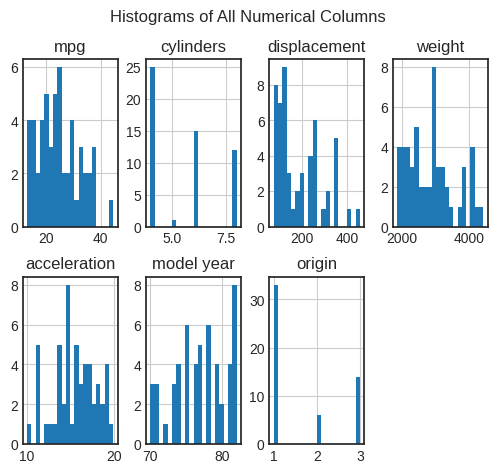

In [ ]:
# Create histograms for all columns in the DataFrame
df.hist(bins=20, figsize=(6, 5), layout=(2, 4))
plt.suptitle('Histograms of All Numerical Columns')
plt.show()

Most of the graphs show that the data in this part of the df is numeric. But origin is categorical, even though the data is numeric, so in the next steps it will be necessary to change the data type of this column to category.

I consider it necessary to check the data values of the object type to see if the data type is defined correctly.

In [ ]:
print(df['horsepower'].value_counts())

horsepower
67     4
90     4
70     3
110    3
145    2
85     2
75     2
105    2
115    2
112    2
88     2
100    2
?      2
97     2
120    1
140    1
116    1
68     1
63     1
84     1
125    1
150    1
139    1
89     1
180    1
81     1
225    1
61     1
95     1
94     1
175    1
153    1
79     1
Name: count, dtype: int64


As we can see that despite the object data type the horsepower column contains mostly data written in numbers, but there is also a question mark, which is most likely no data, so in the next steps (cleaning) we have to fix both points.

In [ ]:
print(df['Car model'].value_counts())

Car model
ford          7
datsun        7
chevrolet     6
plymouth      5
amc           3
toyota        3
buick         3
audi          2
pontiac       2
volvo         2
oldsmobile    2
dodge         1
mazda         1
honda         1
cadillac      1
mercury       1
saab          1
subaru        1
chevy         1
vw            1
chevroelt     1
nissan        1
Name: count, dtype: int64


As observed from the output, the 'Car model' column contains several unique values, each representing different car brands or models, which qualify it as categorical data suitable for further analysis. However, it's important to note some inconsistencies and potential duplicates in the data, such as 'chevy' and 'chevrolet' or 'chevroelt' and 'chevrolet', which should be standardized to ensure uniformity. This standardization will help in accurate categorization and analysis.

This revised comment highlights the need for data cleaning to address inconsistencies in categorical labels, making it clear that while the data is essentially ready for categorical analysis, some preprocessing steps are needed to ensure its accuracy and usefulness.

## Data Cleaning

Data cleaning is an essential preliminary step in data analysis to ensure the accuracy and effectiveness of the insights derived from the data. By standardizing column names, handling missing values, and ensuring consistency across categorical data, we create a solid foundation for reliable statistical analysis. This process helps prevent common pitfalls such as data duplication, misinterpretation, and errors in analysis caused by unclean data.



### Standardize Column Names
To improve data handling and consistency, we standardized column names by converting them to lowercase and replacing spaces with underscores. This normalization enhances programming compatibility and helps avoid syntax errors commonly triggered by irregular naming conventions.

In [ ]:
# Standardize column names: convert to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Display the standardized column names to verify the changes
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_model'],
      dtype='object')


In these steps, we've standardized the DataFrame's column names by converting them to lowercase and replacing spaces with underscores to improve data handling. Changes such as 'model year' to 'model_year' enhance programming compatibility and prevent potential syntax errors. The final column names are verified to ensure correct updates.

### Handle Missing Values
Checking for missing values is crucial as they can significantly affect the outcomes of data analysis.



In [ ]:
# Check for missing values in each column to understand data completeness
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_model       0
dtype: int64

In [ ]:
# Check for NA values in each column (synonym for isnull()) to verify data completeness
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_model       0
dtype: int64

In these steps, we checked the DataFrame for missing values using isnull().sum() and isna().sum() methods. The results show that there are no missing values in any columns, including 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'car_model'. The lack of missing data means the dataset is complete and ready for analysis without needing additional cleaning or filling in missing values.

In [ ]:
# Print the data types of each column again to confirm standardization and check for any anomalies
df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_model        object
dtype: object

After standardizing the column names, we checked the data types again. All columns show expected types, such as numerical data ('mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin') being int64 or float64. However, 'horsepower' and 'car_model' remain as objects, suggesting potential categorical data or non-numeric entries that might need further examination.

### Clean Data
Identify and remove rows with '?' placeholders and convert data types for specific columns.

In [ ]:
# Create a mask to identify columns containing the '?' placeholder, which indicates missing or corrupt data
mask = df.isin(['?']).any()
print(mask)

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
car_model       False
dtype: bool


In [ ]:
# Identify columns that contain the '?' placeholder and print them to understand which columns need cleaning
columns_with_question_mark = mask[mask].index
print(columns_with_question_mark)

Index(['horsepower'], dtype='object')


In [ ]:
# Remove rows with '?' in any column to clean the DataFrame and ensure data integrity
df_cleaned = df[~df.isin(['?']).any(axis=1)]

### Convert and Handle 'horsepower' Values

#### Convert 'horsepower' to Numeric
Let's convert the 'horsepower' column to numeric values. If there are any errors during the conversion (such as non-numeric values), they will be replaced with NaN (Not a Number).

In [ ]:
# Convert 'horsepower' to numeric, coercing errors to NaN
df_cleaned['horsepower'] = pd.to_numeric(df_cleaned['horsepower'], errors='coerce')




<ipython-input-17-5265261d3e28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['horsepower'] = pd.to_numeric(df_cleaned['horsepower'], errors='coerce')


In this step, we converted the 'horsepower' column from an object type to numeric. By using pd.to_numeric with the option errors='coerce', any non-numeric values that could not be converted are replaced with NaN. This ensures that all entries in the 'horsepower' column are appropriate for numerical analysis.

#### Handle NaN Values in 'horsepower'
Handle these NaN values by filling them with the mean of the 'horsepower' column. This will ensure that the 'horsepower' column contains only numeric values without any missing data.

In [ ]:
# Handle NaN values in 'horsepower' by filling them with the mean (or any other strategy)
df_cleaned['horsepower'].fillna(df_cleaned['horsepower'].mean(), inplace=True)

<ipython-input-18-28c484a90d7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['horsepower'].fillna(df_cleaned['horsepower'].mean(), inplace=True)


In [ ]:
# Display the column names of the cleaned DataFrame to verify the data cleaning process
print(df_cleaned.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_model'],
      dtype='object')


After converting 'horsepower' to numeric, we addressed any resulting NaN values by filling them with the mean of the 'horsepower' column. This approach maintains data integrity for further statistical analysis. We then confirmed that the column names remain consistent in the cleaned DataFrame, ensuring that no accidental changes occurred during data cleaning.

### Convert Data Types
Convert data types for specific columns in the cleaned DataFrame using .loc to avoid SettingWithCopyWarning.

In [ ]:
# Convert data types for specific columns in the cleaned DataFrame using .loc to avoid SettingWithCopyWarning

# Convert 'horsepower' to float for numerical analysis
df_cleaned.loc[:, 'horsepower'] = df_cleaned['horsepower'].astype('float')

# Convert 'origin' to category as it represents categorical data
df_cleaned.loc[:, 'origin'] = df_cleaned['origin'].astype('category')

# Convert 'car_model' to category as it represents categorical data
df_cleaned.loc[:, 'car_model'] = df_cleaned['car_model'].astype('category')

In [ ]:
#Display the data types of each column to verify the changes made to the cleaned DataFrame
print(df_cleaned.dtypes)

mpg              float64
cylinders          int64
displacement       int64
horsepower         int64
weight             int64
acceleration     float64
model_year         int64
origin          category
car_model         object
dtype: object


In this step, we adjusted the data types of specific columns to better suit our analysis needs. We converted 'horsepower' to a float for more precise numerical analysis. We also changed 'origin' and 'car_model' to categorical types because these fields represent categories rather than numerical values. This helps optimize memory usage and improves performance for operations involving these columns. The data types after these changes confirm that our DataFrame is now well-structured for further analysis

#### Standardizing Car Model Names
In this section, we adjust the 'car_model' column to fix inconsistent names for the same car model. For example, 'chevy' and 'chevroelt' are both corrected to 'chevrolet'. We use a dictionary called corrections to list these changes and apply them with the replace method. This ensures our data is consistent and ready for accurate analysis.



In [ ]:
# Define the mapping of names to be standardized
corrections = {
    'chevy': 'chevrolet',
    'chevroelt': 'chevrolet'
}

# Replace the variations with 'chevrolet'
df['car_model'] = df['car_model'].replace(corrections)

#Check car_model values
print(df['car_model'].value_counts())

car_model
chevrolet     8
ford          7
datsun        7
plymouth      5
amc           3
toyota        3
buick         3
audi          2
pontiac       2
volvo         2
oldsmobile    2
mercury       1
mazda         1
honda         1
cadillac      1
saab          1
dodge         1
subaru        1
vw            1
nissan        1
Name: count, dtype: int64


After updating the names in the 'car_model' column, we check the results to ensure all variations like 'chevy' and 'chevroelt' have been correctly changed to 'chevrolet'. This confirmation shows our data is now more uniform and reliable for further analysis.

In [ ]:
# Display the cleaned DataFrame
print(df_cleaned.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8           318         150    3436          11.0   
1  14.0          8           455         225    3086          10.0   
2  24.0          4           107          90    2430          14.5   
3  28.0          4           140          90    2264          15.5   
5  19.0          6           250         100    3282          15.0   

   model_year origin  car_model  
0          70      1   plymouth  
1          70      1      buick  
2          70      2       audi  
3          71      1  chevrolet  
5          71      1    pontiac  


In this section each of these adjustments was made with the aim of refining our data's structure and usability. The successful conversion and handling of 'horsepower' from an object to a float after cleaning invalid entries demonstrate our dataset's preparedness for detailed analytical tasks. This cleanliness, coupled with the categorization of nominal data, ensures that our dataset is not only clean but also optimally organized for analysis.

### Remove Outliers
The final stage of data cleaning is to remove outliers if necessary.

First of all, we need to quickly understand how our data is distributed in numerical columns.

For this purpose, we will perform a quick visual analysis using histogram charts.

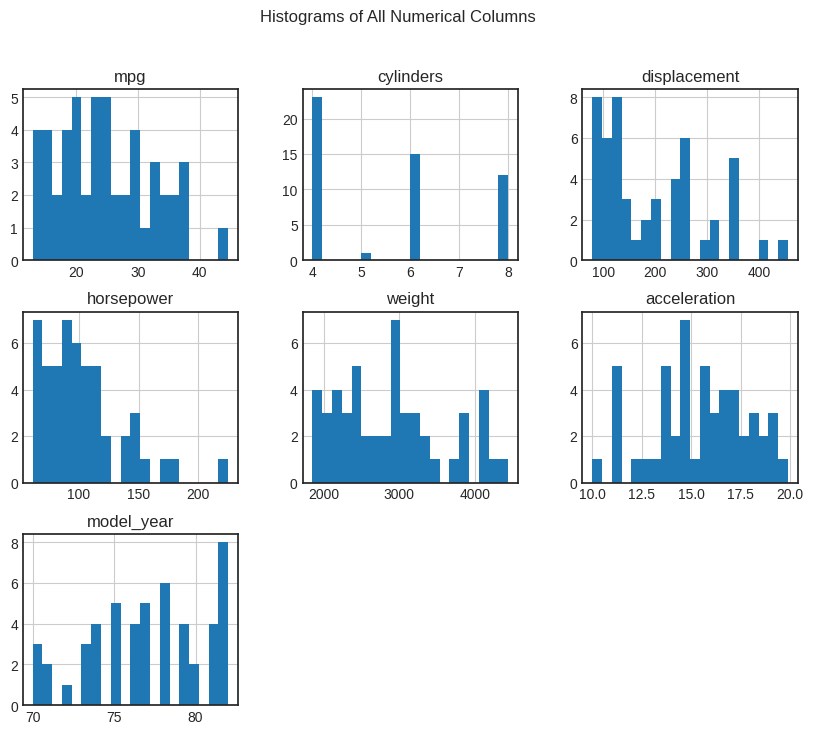

In [ ]:
# Create a histogram for each numeric column in the DataFrame
df_cleaned.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of All Numerical Columns')
plt.show()

These histograms for the numerical columns 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', and 'model_year' show the distribution of data for each variable. The distributions indicate some extreme values, but they are not excessively skewed. These values seem to be part of the natural variability in car specifications rather than errors. Therefore, for this analysis, it is reasonable to keep these outliers as they provide useful information about the range of car characteristics.

However, if we had to remove outliers to focus on the central trend of the data, the Interquartile Range (IQR) method would be a good choice. The IQR method identifies outliers as values beyond 1.5 times the IQR from the first and third quartiles. This method is robust and commonly used to handle outliers, ensuring that only extreme values that significantly deviate from the main data are excluded.

## Descriptive Statistics

In any data analysis, understanding the core characteristics of your dataset through descriptive statistics is crucial. This step involves summarizing the main features of a dataset quantitatively, providing insights into the spread and central tendencies of the data. It sets the stage for deeper analysis, helping identify trends, outliers, and the overall behavior of the data points across different dimensions.

### Calculate Descriptive Statistics
First, we compute basic descriptive statistics for all numerical columns, which will include measures like the mean, standard deviation, minimum, maximum, and quartiles.

In [ ]:
# Display descriptive statistics for the cleaned DataFrame
print(df_cleaned.describe().T)

              count         mean         std     min     25%     50%     75%  \
mpg            51.0    24.833333    7.642268    13.0    19.0    24.0    29.5   
cylinders      51.0     5.549020    1.616338     4.0     4.0     6.0     6.0   
displacement   51.0   194.019608   99.124667    79.0   110.0   168.0   255.0   
horsepower     51.0   102.921569   33.668884    61.0    80.0    95.0   115.0   
weight         51.0  2897.941176  712.576127  1850.0  2325.0  2900.0  3251.5   
acceleration   51.0    15.362745    2.453076    10.0    13.8    15.5    17.1   
model_year     51.0    77.000000    3.622154    70.0    74.5    77.0    80.0   

                 max  
mpg             44.6  
cylinders        8.0  
displacement   455.0  
horsepower     225.0  
weight        4440.0  
acceleration    19.9  
model_year      82.0  


**Overview**:

**mpg**:

   MPG Variability:The range in miles per gallon (MPG) from 13.0 to 44.6 and a standard deviation of 7.64 indicates significant differences in fuel efficiency among the vehicles. This variation could be influenced by different factors such as engine size, vehicle type, and technological advancements. Understanding these variations is crucial for studies focusing on improving fuel efficiency or assessing the impact of technological changes over time.

**displacement and horsepower**:

   Engine Size and Power: With engine displacement values ranging from 79 to 455 and horsepower from 61 to 225, the dataset includes both small, efficient engines and larger, more powerful ones. Analyzing how displacement relates to horsepower could offer insights into engine efficiency and performance characteristics.

**weight and acceleration**:

   Vehicle Weight and Performance: The vehicle weight varies widely, impacting performance metrics like acceleration, which ranges from 10 to 19.9 seconds. Exploring the relationship between weight and acceleration could provide insights into how vehicle design affects performance, important for both manufacturers and consumers.

**model_year**:

   Historical Trends: The model years span from 1970 to 1982, a period known for significant changes in automotive regulations and technology. Analyzing trends across these years can help identify how external factors such as economic conditions and regulatory changes influenced vehicle design and performance.


**Outliers and Distribution**:
   - Observing the minimum and maximum values across different attributes like MPG and horsepower highlights the presence of extreme values or outliers. These outliers need careful examination as they can skew analyses and might lead to misleading conclusions if not properly managed.

**Categorical Insights**:
   - Exploring categorical data like the origin of the vehicles, which shows different counts for regions, could reveal preferences or trends in vehicle imports and production across regions. This can assist in understanding market dynamics and planning for production or marketing strategies.

By examining these aspects, we can derive a more comprehensive understanding of the data, leading to better-informed decisions and analyses. This approach ensures that all significant trends and anomalies are considered, enhancing the reliability of any subsequent analysis or model building.

### Calculate Median and Percentiles
Calculate and display the median and percentile values for the cleaned DataFrame.

In [ ]:
# Select only numeric columns from the cleaned DataFrame
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])

# Calculate median values for the numeric columns in the cleaned DataFrame
median_values = numeric_columns.median()

# Display the median values
print("Median values for the numeric columns in the cleaned DataFrame:")
print(median_values)

Median values for the numeric columns in the cleaned DataFrame:
mpg               24.0
cylinders          6.0
displacement     168.0
horsepower        95.0
weight          2900.0
acceleration      15.5
model_year        77.0
dtype: float64


The median values are reflective of the dataset's midpoint. For example, the median mpg (miles per gallon) is 24.0, which indicates that half the cars consume fuel more efficiently than this rate while the other half consume less efficiently. Similarly, the median values for other attributes like cylinders, displacement, and horsepower offer a glimpse into the typical features of the vehicles in the dataset. This can help in understanding what is common among the majority of the cars analyzed.

In [ ]:
# Display the 5th percentile values for the numeric columns in the cleaned DataFrame
percentile_5th = numeric_columns.quantile(0.05)
print("5th percentile values for the numeric columns in the cleaned DataFrame:\n", percentile_5th)

5th percentile values for the numeric columns in the cleaned DataFrame:
 mpg               14.00
cylinders          4.00
displacement      87.50
horsepower        67.00
weight          1947.50
acceleration      11.05
model_year        70.50
Name: 0.05, dtype: float64


In [ ]:
# Display the 95th percentile values for the numeric columns in the cleaned DataFrame
percentile_95th = numeric_columns.quantile(0.95)
print("95th percentile values for the numeric columns in the cleaned DataFrame:\n", percentile_95th)

95th percentile values for the numeric columns in the cleaned DataFrame:
 mpg               37.5
cylinders          8.0
displacement     355.5
horsepower       164.0
weight          4104.5
acceleration      19.0
model_year        82.0
Name: 0.95, dtype: float64



The **5th percentile** values show the lower end of the data spectrum. For instance, only 5% of cars have an mpg lower than 14.0 or horsepower less than 67.0. These figures can help identify the outliers or exceptional cases such as unusually low performance or efficiency.

Conversely, **the 95th percentile** values represent the upper extreme of the data. Only 5% of cars exceed these values, such as having mpg higher than 37.5 or a weight above 4104.5 pounds. This indicates the maximum capabilities or features observed in the dataset.

From the analysis, the data suggest a reasonable range and distribution for most attributes. The median and percentile values align well with typical expectations for vehicle characteristics. The wide range in some attributes like displacement and horsepower highlight the diversity in vehicle types, from economical to more powerful models. The analysis ensures a comprehensive understanding of the dataset, which is crucial for further statistical modeling or making informed decisions related to vehicle performance and manufacturing trends.

### Categorical Data

Categorical data analysis involves examining variables that represent distinct groups or categories. In this dataset, the primary categorical variables are car_model and origin. Analyzing these variables helps us understand the distribution and frequency of different categories within the data.

In [ ]:
# Count the occurrences of each unique origin
origin_counts = df['origin'].value_counts()

# Display the counts
print(origin_counts)

origin
1    33
3    14
2     6
Name: count, dtype: int64


In [ ]:
# Count the occurrences of each unique car model
car_model_counts = df['car_model'].value_counts()

# Display the counts
print(car_model_counts)

car_model
chevrolet     8
ford          7
datsun        7
plymouth      5
amc           3
toyota        3
buick         3
audi          2
pontiac       2
volvo         2
oldsmobile    2
mercury       1
mazda         1
honda         1
cadillac      1
saab          1
dodge         1
subaru        1
vw            1
nissan        1
Name: count, dtype: int64


In [ ]:
print(df[['car_model', 'origin']].value_counts())

car_model   origin
chevrolet   1         8
datsun      3         7
ford        1         7
plymouth    1         5
amc         1         3
buick       1         3
toyota      3         3
volvo       2         2
audi        2         2
pontiac     1         2
oldsmobile  1         2
subaru      3         1
saab        2         1
mercury     1         1
nissan      3         1
mazda       3         1
honda       3         1
dodge       1         1
cadillac    1         1
vw          2         1
Name: count, dtype: int64


The **'origin'** variable categorizes cars by their country of manufacture. Our findings show that the majority of cars (33 out of 53) are from origin '1', which typically represents cars manufactured in the USA. Origin '3', likely representing Asian manufacturers, follows with 14 cars, and European manufacturers (origin '2') have the least representation with just 6 cars. This distribution suggests a predominance of American cars in the dataset, which might reflect market preferences or the specific scope of the data collection.


The **'car_model'** counts provide insights into the diversity and frequency of different car models in the dataset. Chevrolet is the most common model with 8 instances, followed closely by Ford and Datsun, each with 7 occurrences. Other brands like Plymouth, AMC, Toyota, and Buick show moderate representation, while brands like Mercury, Mazda, Honda, and several others appear only once. This variety in the dataset underscores a broad spectrum of car models, indicating a heterogeneous vehicle sample that can be useful for comparative analyses across different car types.

The analysis of **categorical data** highlights significant diversity in car origins and models, which is essential for understanding market distributions and consumer preferences. The dominance of certain brands and origins may influence the findings and interpretations of further analyses, such as fuel efficiency studies or market penetration reports. Future studies could explore the reasons behind the prevalence of certain car models and origins to provide deeper insights into industry trends or consumer behaviors.

## Data Visualization

Data visualization is a crucial step in data analysis. It helps to uncover patterns, trends, and insights that might not be immediately obvious from raw data. By using different types of visualizations, such as histograms, box plots, and scatter plots, we can better understand the distribution, relationships, and variations within the dataset.

Visualizations make complex data more accessible and understandable. They allow us to quickly identify outliers, detect anomalies, and grasp the overall structure of the data. Furthermore, visualizations can highlight correlations and interactions between different variables, which are essential for making informed decisions and drawing accurate conclusions.

In the following sections, we will explore various visualizations and provide comments on any new or additional insights they reveal about the data under consideration.

### Histograms
Histograms are great for showing the distribution of a numerical variable. They group data into bins, making it easy to see patterns and identify outliers. Histograms help us quickly understand the central tendency, spread, and overall shape of the data.

We'll start with a histogram for the 'mpg' (miles per gallon) column to see how fuel efficiency is distributed among the cars in our dataset.

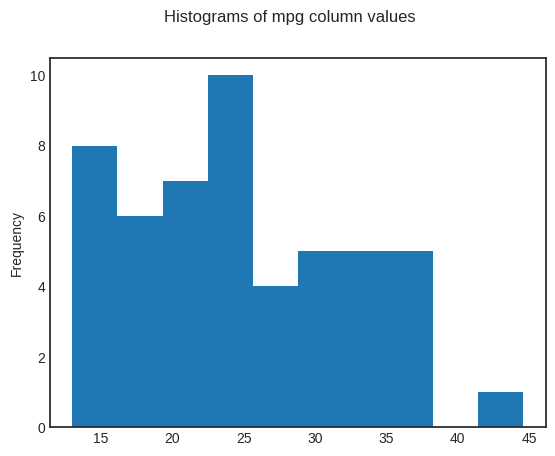

In [ ]:
# Plot a histogram for the 'mpg' column
df_cleaned['mpg'].plot.hist()
plt.suptitle('Histograms of mpg column values')
plt.show()


**Key Observations on this chart.**

This histogram shows the distribution of miles per gallon (MPG) for the cars in the dataset.


Peak Frequency: The most common MPG range is between 23 and 27 MPG, with 10 cars falling into this category.

Distribution: The distribution is skewed to the right, with a few cars having higher MPG values. Most cars have MPG values between 15 and 35.

Outliers: There is a noticeable drop in frequency for cars with MPG around 40, suggesting they are less common.



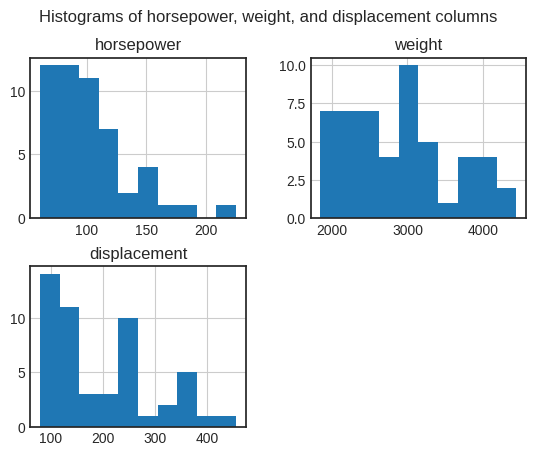

In [ ]:
# Plot histograms for 'horsepower', 'weight', and 'displacement' columns
df_cleaned[['horsepower', 'weight', 'displacement']].hist()
plt.suptitle('Histograms of horsepower, weight, and displacement columns ')
plt.show()

**Key Observations on this chart.**

These histograms display the distributions of horsepower, weight, and displacement for the cars in the dataset.

Horsepower:  The distribution of horsepower is right-skewed, with the majority of cars having horsepower between 75 and 125. There are fewer cars with higher horsepower values, and only a small number exceed 200.

Weight: The weight distribution is somewhat bimodal, with peaks around 2500 and 3200 pounds. The distribution shows a spread between 2000 and 4000 pounds, with fewer cars outside this range.

Displacement: The displacement distribution is also right-skewed, with most cars having a displacement between 100 and 200 cubic inches.
There are fewer cars with higher displacement values, and only a small number exceed 400 cubic inches.


Horsepower and Displacement: Both distributions are right-skewed, indicating a majority of cars have lower to moderate values, with a few cars having significantly higher values.

Weight: The bimodal distribution suggests there might be two distinct groups of cars with different weight ranges.


Outlier.

There are fewer cars with extremely high values for horsepower and displacement, which could be considered outliers.


These histograms help in understanding the general characteristics and variability of horsepower, weight, and displacement in the dataset. They reveal the typical range of values and highlight any potential outliers.

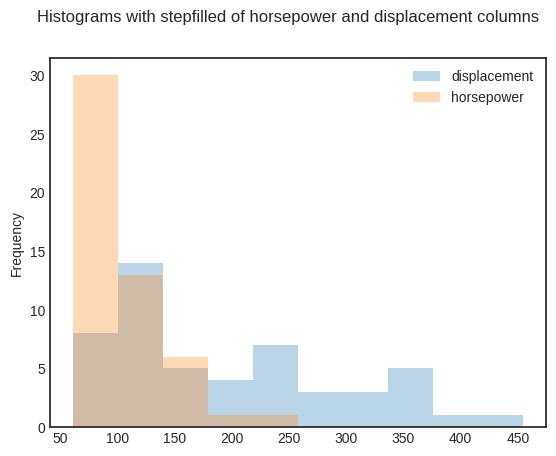

In [ ]:
# Plot stepfilled histograms for 'displacement' and 'horsepower' columns
df_cleaned[['displacement','horsepower']].plot.hist(histtype="stepfilled", bins=10, alpha=0.3)
plt.suptitle('Histograms with stepfilled of horsepower and displacement columns ')
plt.show()

**Key Observations on this chart.**

This overlapping histogram visualizes the frequency distributions of two variables: displacement (in blue) and horsepower (in orange).

Displacement:  The distribution of displacement is right-skewed, with most cars having a displacement between 100 and 200 cubic inches. There are fewer cars with displacement values exceeding 250 cubic inches, with the distribution tailing off significantly after 400 cubic inches.

Horsepower:  The distribution of horsepower is also right-skewed, with the majority of cars having horsepower between 75 and 125. A notable peak is observed at lower horsepower values, with a rapid decline in frequency as horsepower increases beyond 125.

Comparison: Both distributions show a right-skewed pattern, indicating that most cars have lower displacement and horsepower values, with fewer cars having higher values.

Overlap: There is some overlap in the lower ranges, but displacement generally has higher values compared to horsepower.

Outliers: Both distributions show potential outliers with high values, particularly in the displacement distribution.


These histograms help in understanding the relationship and distribution of displacement and horsepower within the dataset, revealing the typical ranges and highlighting any significant differences or outliers.

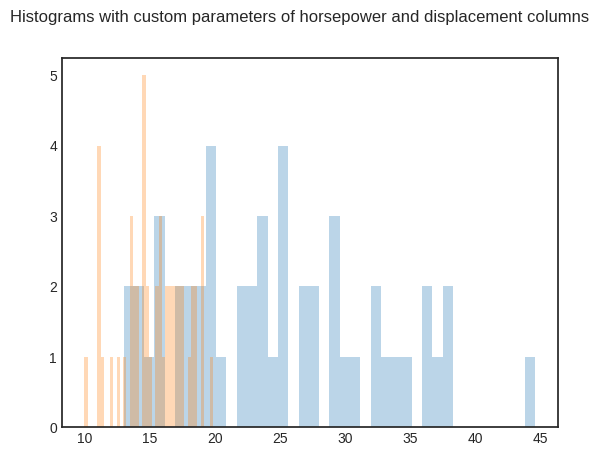

In [ ]:
# Plot histograms for 'mpg' and 'acceleration' with custom parameters
kwargs = dict(histtype="stepfilled", alpha=0.3, bins=40)
x1 = df_cleaned['mpg']
x2 = df_cleaned['acceleration']
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.suptitle('Histograms with custom parameters of horsepower and displacement columns ')
plt.show()

**Key Observations on this chart.**

This overlapping histogram visualizes the frequency distributions of two variables: miles per gallon (MPG) in blue and acceleration in orange.

MPG (Miles Per Gallon): The MPG distribution is fairly spread out with a noticeable peak between 20 and 25 MPG. There are cars with MPG values extending up to 45, but fewer cars fall into the higher MPG range.

Acceleration: The acceleration distribution shows a significant concentration of values between 10 and 15 seconds.
The frequency drops noticeably for higher acceleration times, indicating fewer cars with slower acceleration.

Comparison: The distributions show distinct patterns with MPG values spread out more evenly compared to acceleration values, which are highly concentrated in a narrower range.

Overlap: There is some overlap between the two distributions around the 10-15 range, where both variables have notable frequencies.

Insight: This chart helps highlight the spread and concentration of MPG and acceleration values, indicating typical performance ranges for the cars in the dataset.

These histograms provide a visual comparison of how fuel efficiency and acceleration are distributed across the cars in the dataset, helping to identify typical ranges and potential outliers for each variable.

### Line charts

Line charts are useful for displaying data points connected by lines, ideal for showing trends over time or ordered categories.

Advantages of Line Charts:

Trend Analysis: Great for identifying trends and changes over time.
Comparison: Allows easy comparison of multiple data series.
Clarity: Provides a clear way to visualize data progression.
Our dataset is not perfect for line charts since it lacks time series data or ordered categories. However, we can still use line charts to show trends in numerical variables like weight.

In the following visualizations, we will create line charts to explore trends within our data and provide insights on any patterns we observe.

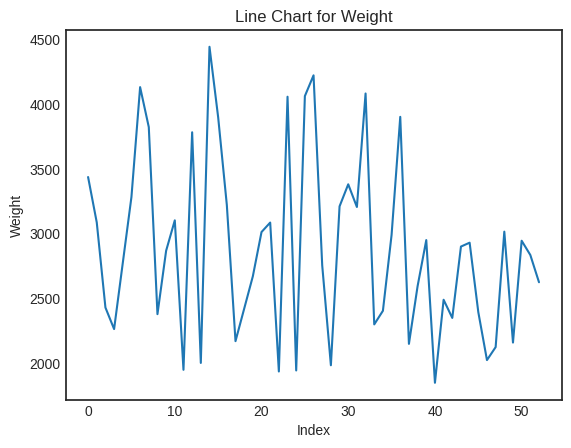

In [ ]:
# Plot line chart for 'weight'
df_cleaned['weight'].plot.line()
plt.title('Line Chart for Weight')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.show()

**Key Observations on this chart.**

This line chart illustrates the weight of cars across different indices in the dataset.


Fluctuations: The chart shows significant fluctuations in weight values across the dataset, with weights ranging from around 1850 to 4500.

Peaks and Troughs: Several peaks and troughs are noticeable, indicating considerable variability in the weight of the cars.

Trend: There is no clear trend visible in the chart, which suggests that the weights do not follow a specific increasing or decreasing pattern over the indices.

General Insight:

- This chart highlights the diverse range of car weights within the dataset, reflecting different car types and models.

- Despite the variability, the line chart effectively shows the spread and extremes of car weights, which could be useful for further analysis related to vehicle performance, fuel efficiency, or other characteristics influenced by weight.

Overall, this line chart provides a clear visual representation of the variability and range in car weights, showcasing the dataset's diversity in vehicle sizes.

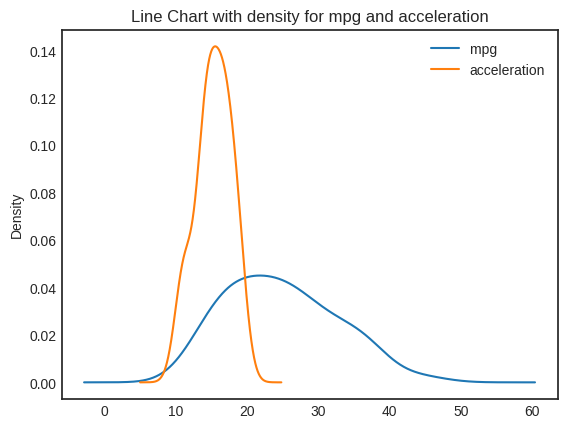

In [ ]:
# Plot density plots for 'mpg' and 'acceleration'
df_cleaned[['mpg','acceleration']].plot.density()
plt.title('Line Chart with density for mpg and acceleration')
plt.show()

**Key Observations on this chart.**

This density plot visualizes the distribution of two variables: 'mpg' (miles per gallon) and 'acceleration'.


MPG Distribution: The 'mpg' curve shows a wider spread, indicating more variability in fuel efficiency among the cars in the dataset. The peak is around 20-25 mpg, suggesting most cars have a fuel efficiency in this range.

Acceleration Distribution: The 'acceleration' curve is more peaked and narrow, centered around 15-20. This indicates that most cars have similar acceleration values, with fewer cars having very high or very low acceleration.

Density plots are advantageous for understanding the distribution and spread of data. They are smoother than histograms and provide a clearer view of where the data is concentrated. This plot reveals that while fuel efficiency varies widely among the cars, acceleration is more consistent.

### Box Plots
Box plots are a useful tool for visualizing data distribution. They show the minimum, first quartile, median, third quartile, and maximum values.

Advantages of Box Plots:

- Outlier Detection: Easily spot outliers.
- Data Distribution: Summarize how data is spread.
- Comparison: Compare different data groups.

Box plots help us quickly understand the range and central values of our data. They are great for spotting patterns and anomalies.

Next, we'll create box plots to examine our dataset's variables and note any interesting findings.

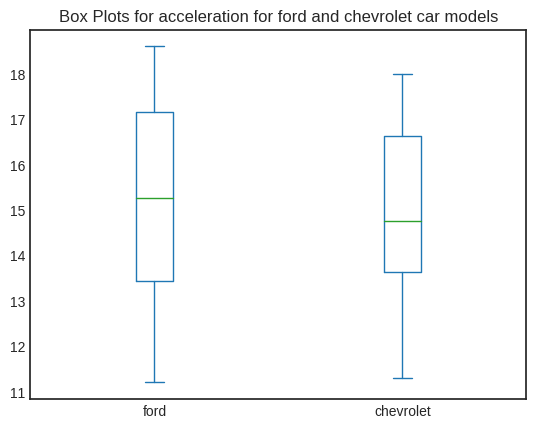

In [ ]:
# Box plots
# Plot box plots for 'acceleration' for 'ford' and 'chevrolet' car models
pd.DataFrame([df_cleaned[df_cleaned["car_model"]=="ford"]["acceleration"],
              df_cleaned[df_cleaned["car_model"]=="chevrolet"]["acceleration"]],
             index=("ford", "chevrolet")).T.plot.box(whis=1)
plt.title('Box Plots for acceleration for ford and chevrolet car models')
plt.show()

**Key Observations on this chart.**

Median Acceleration.

Ford: Around 15.5 seconds.
Chevrolet: About 15 seconds, indicating slightly better average acceleration.

Interquartile Range (IQR).
Ford: 14 to 17 seconds.
Chevrolet: 14 to 17 seconds, showing similar variability.

Whiskers.
Ford: 11 to 18 seconds.
Chevrolet: 11 to 18 seconds.

Outliers.
None for either brand.

Overall, Chevrolet cars have a slightly better median acceleration compared to Ford cars, but both brands show similar variability and distribution in their acceleration times.

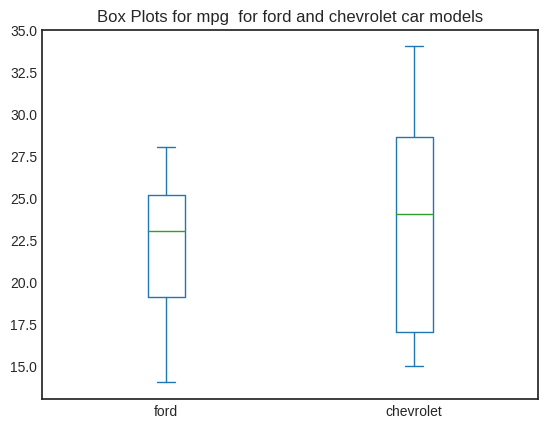

In [ ]:
# Plot box plots for 'mpg' for 'ford' and 'chevrolet' car models
pd.DataFrame([df_cleaned[df_cleaned["car_model"]=="ford"]["mpg"],
              df_cleaned[df_cleaned["car_model"]=="chevrolet"]["mpg"]],
             index=("ford", "chevrolet")).T.plot.box(whis=1)
plt.title('Box Plots for mpg  for ford and chevrolet car models')
plt.show()

**Key Observations on this chart.**

Median MPG.

Ford: The median MPG for Ford cars is around 23. This is the central value, meaning half of the Ford cars have an MPG less than 23 and half have more.

Chevrolet: The median MPG for Chevrolet cars is approximately 26, indicating better fuel efficiency on average compared to Ford.

Interquartile Range (IQR).

Ford: The IQR for Ford spans from about 20 to 27 MPG, showing the middle 50% of MPG values for Ford cars.

Chevrolet: The IQR for Chevrolet is broader, ranging from about 20 to 30 MPG, suggesting more variability in the fuel efficiency of Chevrolet cars.

Whiskers.

Ford: The lower whisker extends down to around 15 MPG, and the upper whisker reaches up to approximately 27.5 MPG.

Chevrolet: The lower whisker is at about 17.5 MPG, and the upper whisker goes up to around 32.5 MPG.

Outliers.

No outliers are present in this box plot for either Ford or Chevrolet, indicating that the MPG values are relatively consistent within the ranges shown.

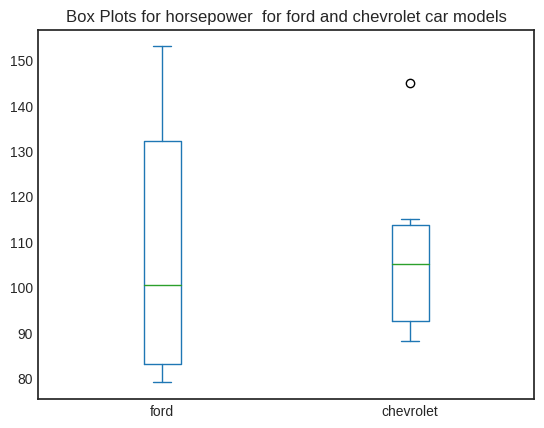

In [ ]:
# Plot box plots for 'horsepower' for 'ford' and 'chevrolet' car models
pd.DataFrame([df_cleaned[df_cleaned["car_model"]=="ford"]["horsepower"],
              df_cleaned[df_cleaned["car_model"]=="chevrolet"]["horsepower"]],
             index=("ford", "chevrolet")).T.plot.box(whis=1)
plt.title('Box Plots for horsepower  for ford and chevrolet car models')
plt.show()

**Key Observations on this chart.**

Ford: The median horsepower is around 105. The interquartile range (IQR) is quite large, indicating variability in the data. There is one significant outlier above 140 horsepower.

Chevrolet: The median horsepower is slightly higher than Ford's, around 110.
The IQR is smaller, indicating less variability compared to Ford.
There is no noticeable outlier, but the maximum horsepower is less than the outlier for Ford.

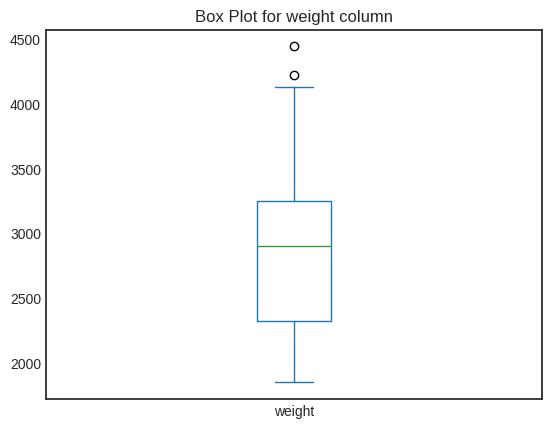

In [ ]:
# Plot box plot for 'weight' column
df_cleaned["weight"].plot.box(whis=1)
plt.title('Box Plot for weight column')
plt.show()

**Key Observations on this chart.**

Median Weight: The median weight is around 3000 pounds. This is the central value of the dataset, indicating that half of the cars weigh less than 3000 pounds and half weigh more.

Interquartile Range (IQR): The IQR spans from about 2500 to 3500 pounds, showing the middle 50% of the weights. This range represents the typical weight of most cars in the dataset.
Whiskers:

The lower whisker extends down to approximately 2000 pounds, indicating the minimum typical car weight in the dataset.

The upper whisker reaches up to about 4000 pounds, indicating the maximum typical weight.

### Scatter Plots
Scatter plots are a fundamental tool in data visualization, used to explore the relationship between two numerical variables. By plotting individual data points on a two-dimensional graph, scatter plots help identify correlations, trends, and potential outliers. They are particularly useful for detecting linear or non-linear relationships between variables and for highlighting clusters or gaps in the data. Scatter plots are essential for performing regression analysis and understanding the strength and direction of relationships within the dataset.

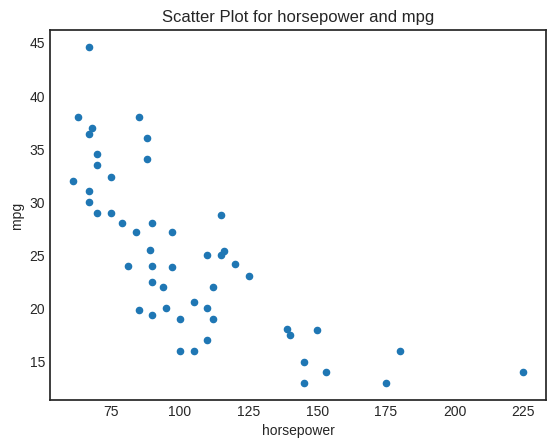

In [ ]:
# Plot scatter plot for 'horsepower' vs. 'mpg'
df_cleaned.plot.scatter(x="horsepower", y="mpg")
plt.title('Scatter Plot for horsepower and mpg')
plt.show()

**Key Observations on this chart.**

[link text](https://)
This scatter plot illustrates the relationship between horsepower and miles per gallon (mpg). Each point represents an individual car's horsepower and its corresponding mpg. The plot reveals a strong negative correlation between these two variables: as horsepower increases, mpg generally decreases. This suggests that vehicles with higher horsepower tend to be less fuel-efficient.


Negative Correlation: The trend line (if added) would slope downwards, indicating that higher horsepower cars usually have lower mpg.

Spread of Data: The data points are more densely packed at lower horsepower and mpg values, showing that most cars fall within this range.

Outliers: There are a few outliers, such as a car with very high horsepower (~225) and low mpg, and a car with very low horsepower ( ~ 75) and high mpg, which deviate from the general trend.

Variability: The spread of points indicates variability in mpg for a given horsepower. For example, cars with around 100 horsepower have a wide range of mpg values from about 15 to 35.


This analysis suggests that while horsepower is a significant factor in determining fuel efficiency, other factors may also influence mpg, as indicated by the variability in the data points.

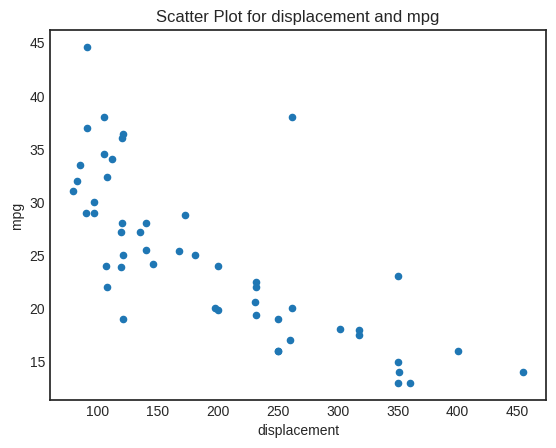

In [ ]:
# Plot scatter plot for 'displacement' vs. 'mpg'
df_cleaned.plot.scatter(x="displacement", y="mpg")
plt.title('Scatter Plot for displacement and mpg')
plt.show()


**Key Observations on this chart.**

This scatter plot shows the relationship between displacement and miles per gallon (mpg). Each point represents a car's displacement and its corresponding mpg. The plot reveals a negative correlation between these two variables: as displacement increases, mpg generally decreases.


Negative Correlation: There is a clear downward trend, indicating that cars with larger engine displacement tend to have lower fuel efficiency.

Data Distribution: The majority of cars have a displacement between 100 and 300, with mpg values ranging widely within this range.

Outliers: There are a few outliers, such as a car with very high displacement (~450) and low mpg, and a car with lower displacement ( ~ 150) but relatively high mpg.

Variability: The spread of points indicates that while displacement is a significant factor in determining mpg, other factors may also influence fuel efficiency. For example, cars with around 200 displacement have mpg values ranging from about 15 to 35.


This analysis suggests that displacement is an important factor in fuel efficiency, with larger engines generally being less efficient. However, the variability in mpg for a given displacement indicates that other factors also play a role in determining fuel efficiency.

### Bar Charts
Plot bar charts for median values by car model.

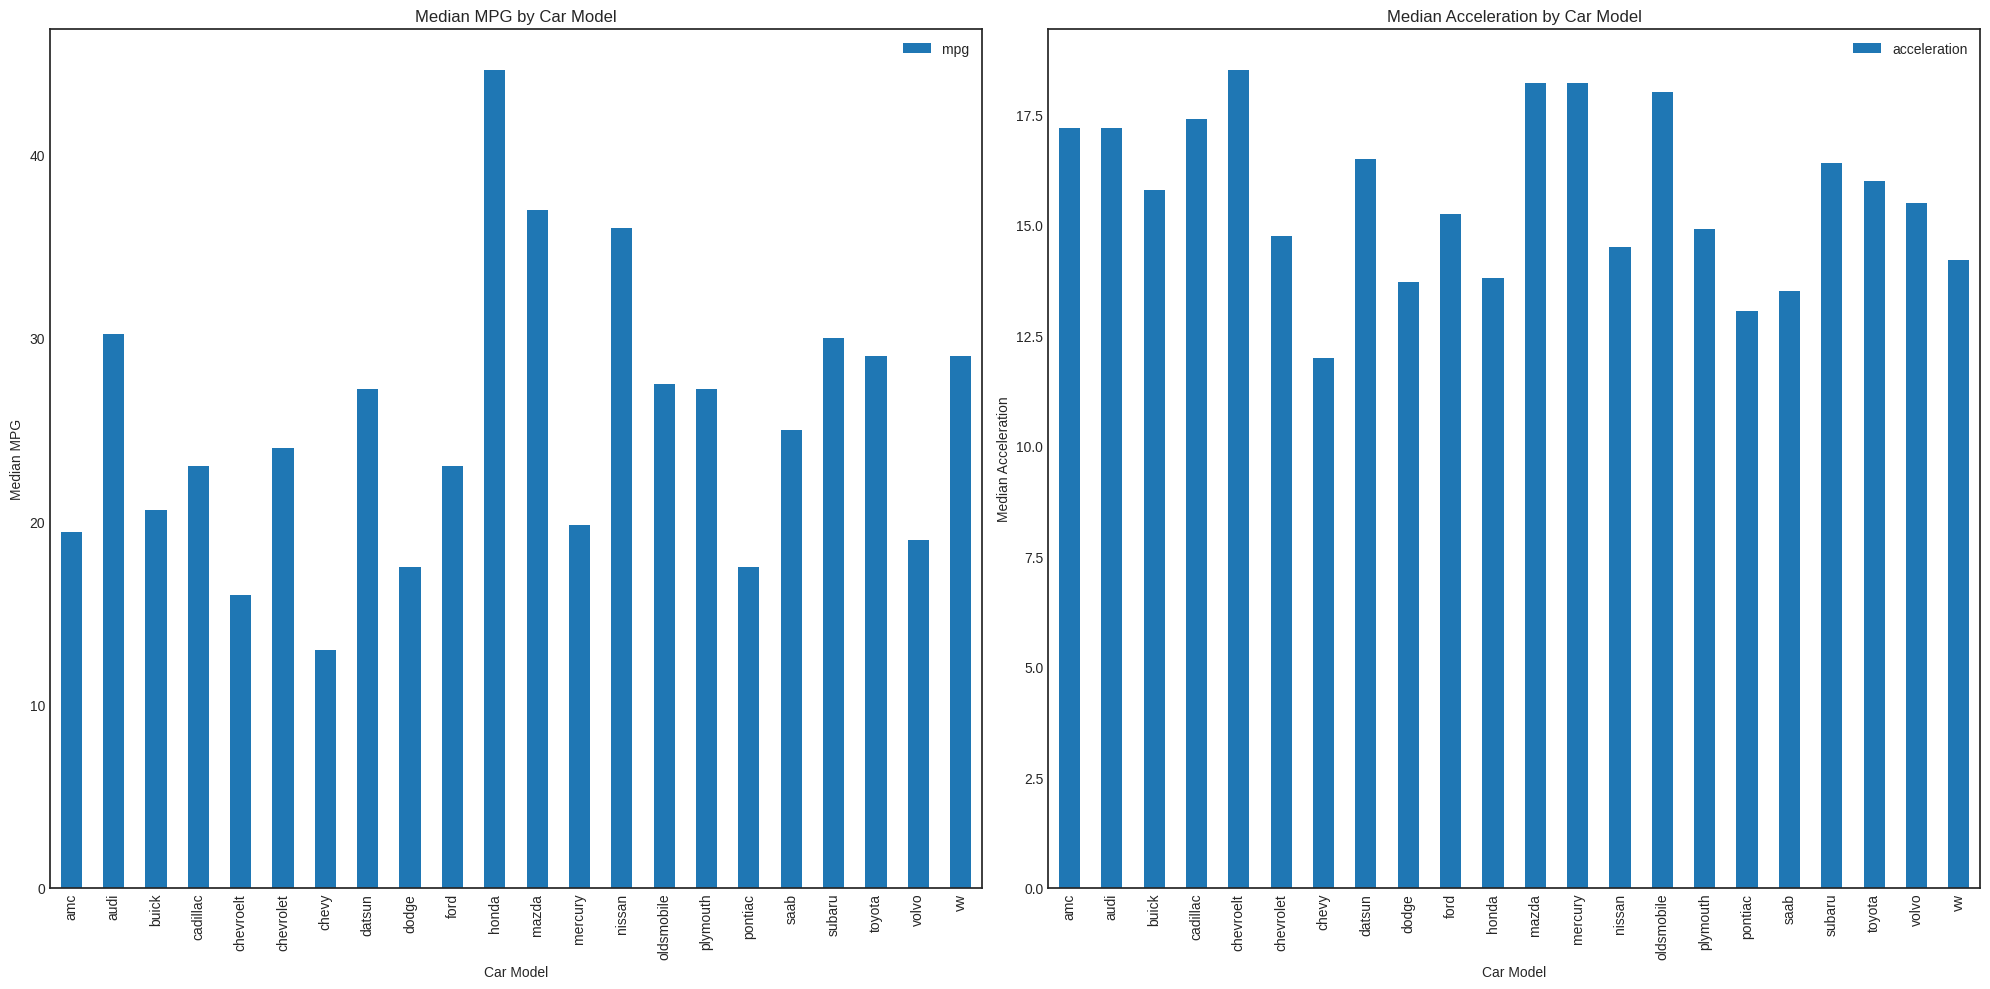

In [ ]:
# Create a figure and a set of subplots in a 1x2 grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot bar chart for median 'mpg' by 'car_model' in the first subplot
df_cleaned.groupby("car_model").agg({'mpg':'median'}).plot.bar(ax=axes[0])
axes[0].set_title('Median MPG by Car Model')
axes[0].set_xlabel('Car Model')
axes[0].set_ylabel('Median MPG')

# Plot bar chart for median 'acceleration' by 'car_model' in the second subplot
df_cleaned.groupby("car_model").agg({'acceleration':'median'}).plot.bar(ax=axes[1])
axes[1].set_title('Median Acceleration by Car Model')
axes[1].set_xlabel('Car Model')
axes[1].set_ylabel('Median Acceleration')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Pie Chart
Plot a pie chart for the count of 'mpg' by 'model year'.

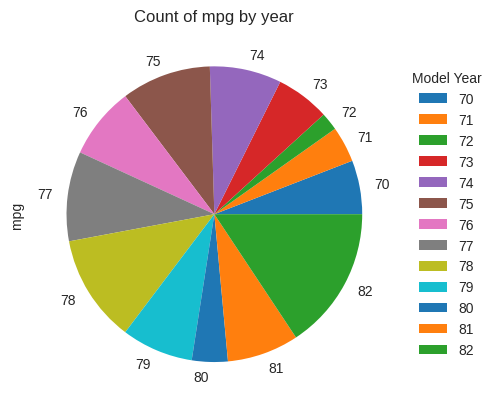

In [ ]:
# Plot pie chart for 'mpg' count by 'model year'
fig, ax = plt.subplots()
df_cleaned.groupby("model_year").count().plot.pie(y="mpg", ax=ax, legend=False)

# Add the legend to the right of the pie chart
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Model Year")

# Set the aspect ratio to be equal so that the pie is drawn as a circle.
ax.set_aspect('equal')
plt.title('Count of mpg by year')
plt.show()

This pie chart presents the distribution of the miles per gallon (mpg) across different model years in our dataset. Each colored segment represents a model year, and the size of each segment shows the proportion of entries for that particular year. From the chart, we can observe a varied distribution, with some years like 78, 79, and 82 having larger segments, suggesting that there were more cars from these years in the dataset. Other years, such as 70 and 71, occupy smaller segments, indicating fewer entries. This visualization effectively highlights the fluctuation in the number of cars across different years within our data, helping us to quickly grasp which years were more or less frequently represented.

### Multiple Box Plots

Multiple box plots are a powerful visualization tool that allows us to compare the distribution of a single variable across different categories. By displaying the range, quartiles, and potential outliers for each category side by side, multiple box plots provide a clear and concise way to identify differences and similarities between groups. This method is particularly useful for spotting trends, variations, and potential anomalies within the data.

The charts below are created to demonstrate visualization skills and options for joint analysis of many variables. The descriptive part is unspecified.



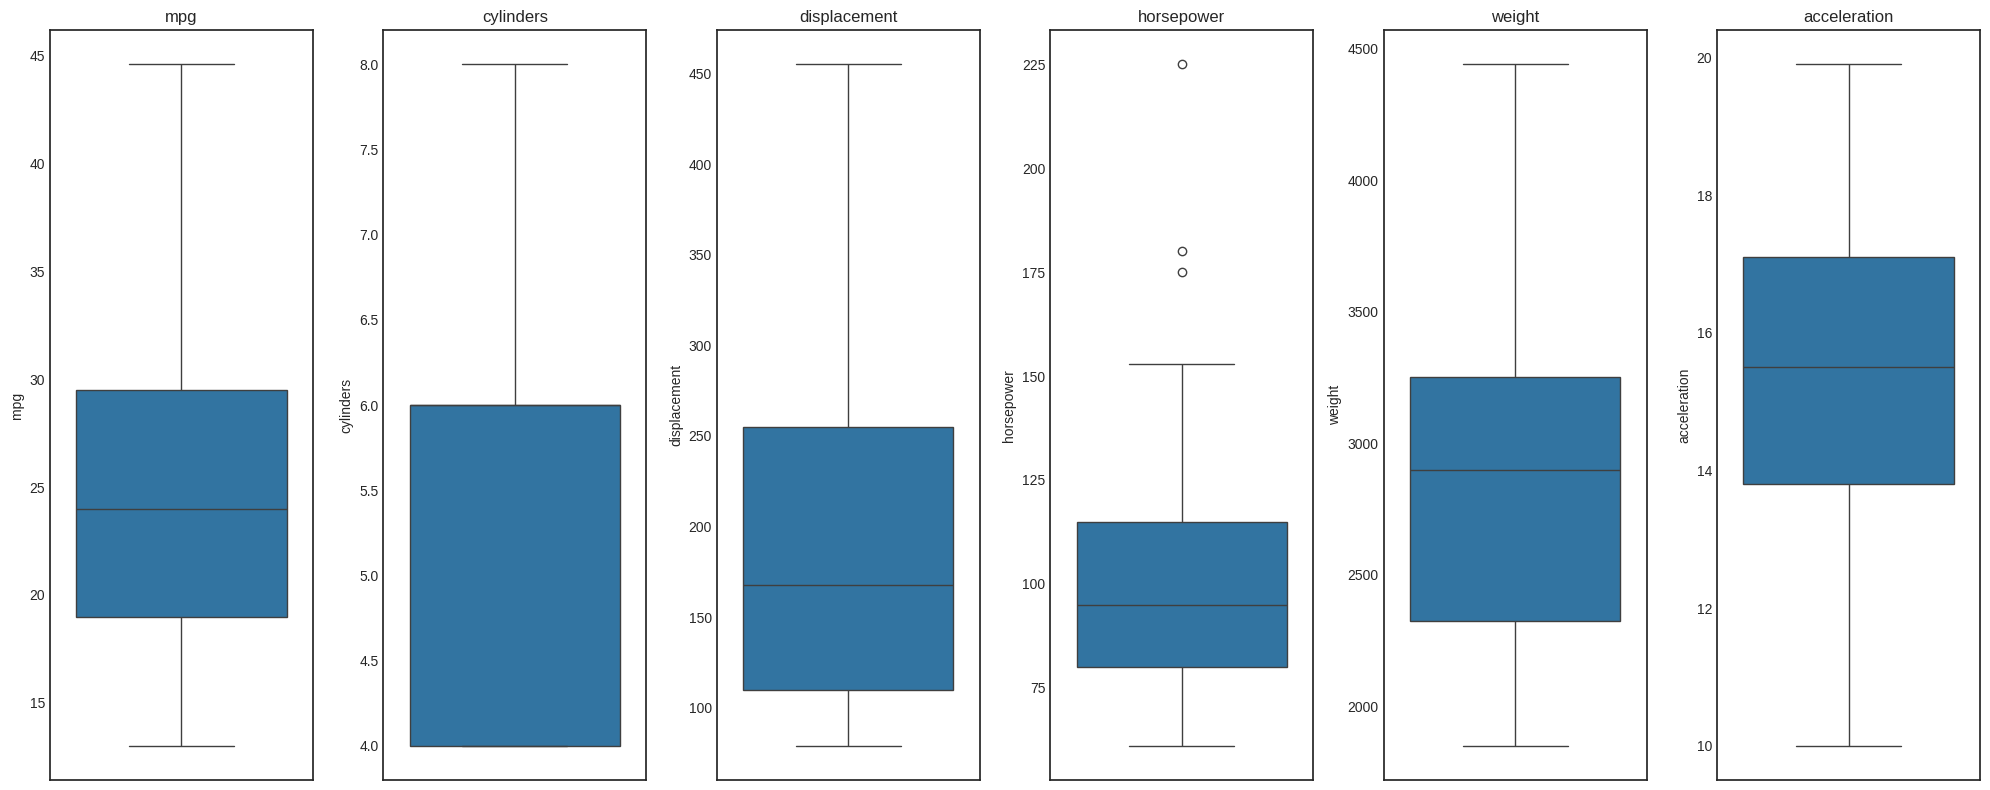

In [ ]:
# Select the columns to plot
columns_to_plot = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 8), sharey=False)
# Plot each column on a separate subplot
for ax, column in zip(axes, columns_to_plot):
    sns.boxplot(y=df_cleaned[column], ax=ax)
    ax.set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

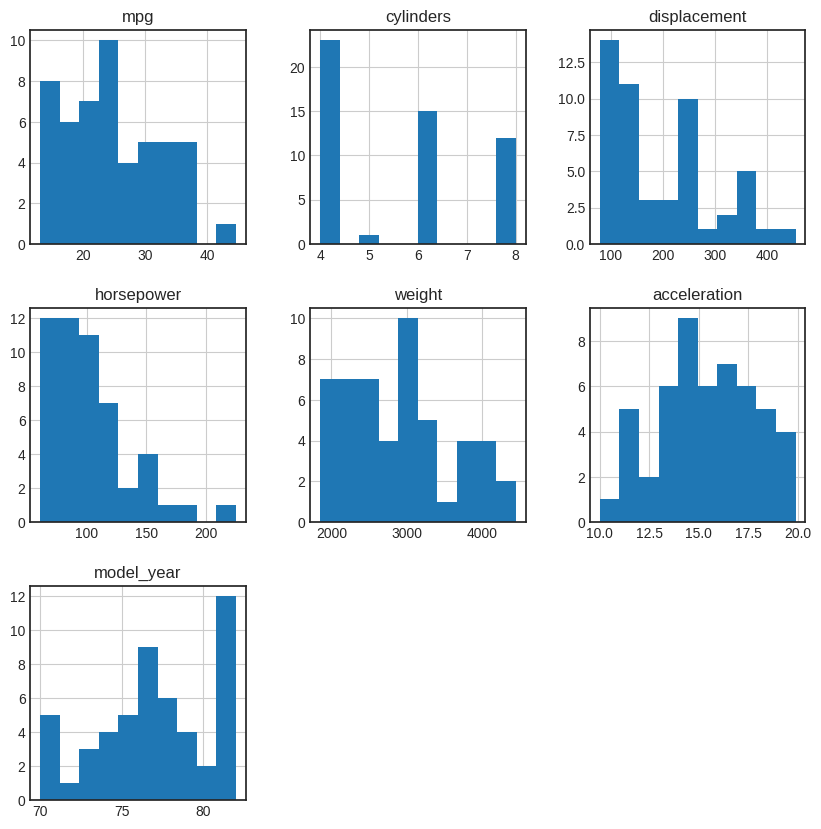

In [ ]:
# Plot histograms for selected columns with specified figure size
df_cleaned[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration","model_year", "origin"]].hist(figsize=(10,10))


These visualizations helped us understand our dataset better, showing key trends, patterns, and potential outliers. For example, outliers in the 'weight' box plot indicated a few extremely heavy cars. This thorough approach ensures a strong foundation for further data exploration and decision-making, providing clear insights into the characteristics and relationships within our dataset.


## Correlation Analysis

Correlation analysis helps us see how closely two variables are related. In this part of our work, we're going to find out how different car features, like miles per gallon (mpg) and weight, relate to each other. We calculate something called a correlation coefficient for each pair of variables to measure their relationship. This number tells us if they move together and how strong this movement is.

We'll use our dataset to explore important relationships, for instance, how the weight of a car impacts its fuel efficiency. Visual tools like heatmaps or scatter plots will help us see these relationships more clearly. This analysis is really helpful because it can show us which features might be good predictors of other features, guiding our decisions in further analyses or model building



### Calculate Correlation Matrix
In our study, we'll start by creating a correlation matrix to understand the relationships between different numerical variables. A correlation matrix is a table where the cell values between two variables range from -1 to 1, indicating the strength of the relationship. A value of 1 implies a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 means no correlation at all.

First, we need to separate numerical and categorical data from our dataset because correlation calculations are applicable primarily to numerical data.

In [ ]:
# Correlation matrix
# Separate numerical and categorical columns
df_cleaned_num = df_cleaned.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
df_cleaned_cat = df_cleaned.select_dtypes(include=['object', 'category'])

In [ ]:
# Display information about numerical columns
print(df_cleaned_num.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 52
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           51 non-null     float64
 1   cylinders     51 non-null     int64  
 2   displacement  51 non-null     int64  
 3   horsepower    51 non-null     int64  
 4   weight        51 non-null     int64  
 5   acceleration  51 non-null     float64
 6   model_year    51 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 3.2 KB
None


Our dataset includes 51 observations for 7 numerical features, all fully populated without any missing values. This setup is ideal for conducting correlation analysis efficiently.

In [ ]:
# Display information about categorical columns
print(df_cleaned_cat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   origin     51 non-null     category
 1   car_model  51 non-null     object  
dtypes: category(1), object(1)
memory usage: 999.0+ bytes
None


The dataset also handles categorical data efficiently, with 51 entries across two features and optimized memory usage.

In [ ]:
# Display the correlation matrix for numerical columns
print(df_cleaned_num.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.728004     -0.753846   -0.744626 -0.801058   
cylinders    -0.728004   1.000000      0.937149    0.787278  0.877656   
displacement -0.753846   0.937149      1.000000    0.865023  0.872573   
horsepower   -0.744626   0.787278      0.865023    1.000000  0.702750   
weight       -0.801058   0.877656      0.872573    0.702750  1.000000   
acceleration  0.363378  -0.442657     -0.483563   -0.715720 -0.246559   
model_year    0.544191  -0.228879     -0.307315   -0.366368 -0.237879   

              acceleration  model_year  
mpg               0.363378    0.544191  
cylinders        -0.442657   -0.228879  
displacement     -0.483563   -0.307315  
horsepower       -0.715720   -0.366368  
weight           -0.246559   -0.237879  
acceleration      1.000000    0.254124  
model_year        0.254124    1.000000  


we compute the correlation matrix for the numerical variables, which helps us quickly identify relationships.

Fuel Efficiency (mpg): There's a strong negative correlation with displacement, horsepower, and weight, suggesting that cars with more power and mass typically have lower fuel efficiency.

Acceleration: Shows a positive correlation with mpg and model year, indicating that newer, faster-accelerating cars tend to be more fuel-efficient.

Engine Size (Cylinders/Displacement): These features show a high positive correlation, meaning cars with more cylinders usually have bigger engines.

This correlation matrix is crucial for pinpointing significant variables that might influence others, assisting in further analysis and model-building activities.

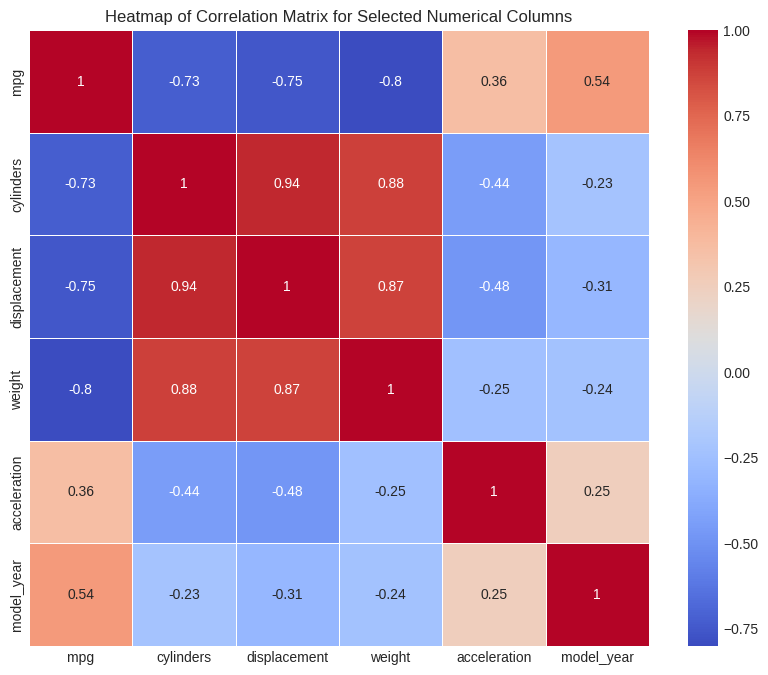

In [ ]:
# Plot a heatmap of the correlation matrix for selected numerical columns
selected_columns = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
correlation_matrix = df_cleaned_num[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Selected Numerical Columns')
plt.show()


**Key Observations on this chart.**


*Fuel Efficiency (mpg) and Engine Attributes:*

There is a strong negative correlation between mpg and cylinders (-0.73), displacement (-0.75), and weight (-0.8). This indicates that vehicles with more cylinders, larger engines, and greater weight tend to have lower fuel efficiency.

The negative correlations align with intuitive expectations, as heavier cars with larger engines typically require more fuel.


*Engine Size and Vehicle Weight:*
    
Cylinders and displacement show a very high positive correlation (0.94), suggesting that vehicles with more cylinders generally have larger engine displacements.
Both cylinders and displacement also show strong positive correlations with weight (0.88 and 0.87, respectively), underscoring that larger, more powerful engines increase vehicle weight.

*Acceleration:*

Interestingly, acceleration shows a moderately positive correlation with mpg (0.36) and a small positive correlation with model year (0.25). This might suggest that newer models have been designed to accelerate faster while also being more fuel-efficient.

Acceleration has negative correlations with displacement and weight, indicating that heavier, larger-engined cars may not accelerate as quickly.

*Temporal Changes (Model Year):*

The correlation between mpg and model year is moderately positive (0.54), indicating improvements in fuel efficiency over the years within the dataset. This trend could be due to technological advancements and stricter emissions standards.

Model year has slight negative correlations with displacement and weight, potentially reflecting a shift towards smaller, lighter cars in newer models.

To wrap up this subsection, the correlation matrix has been instrumental in uncovering the relationships between various vehicle attributes. Exploring the connections between mpg, weight, displacement, and horsepower has deepened our understanding of what influences vehicle performance. This insight is crucial for further research, especially if we're aiming to enhance vehicle designs or performance. These correlations lay a solid foundation for future, more detailed studies that might involve statistical or predictive modeling to delve into causes and effects.

### Pearson Correlation
In this part of our project , we'll explore Pearson correlation, which measures how strongly two continuous variables are related. This method helps us understand if increases in one variable are associated with increases (or decreases) in another, providing insights into how features of our dataset interact. As students, learning about Pearson correlation is essential for analyzing relationships within our data effectively.

In [ ]:
# Calculate and display the Pearson correlation coefficient and p-value for 'mpg' and 'acceleration'
pearson_coef, p_value = stats.pearsonr(df_cleaned_num["mpg"], df_cleaned_num["acceleration"])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value)

Pearson Correlation Coefficient:  0.363377690612636 and a P-value of: 0.008768138874547148


Correlation Between 'mpg' and 'acceleration':

Pearson Correlation Coefficient: The calculated value of 0.363 indicates a moderate positive correlation between 'mpg' (miles per gallon) and 'acceleration'. This suggests that cars with better fuel efficiency tend to have slightly better acceleration characteristics.

P-value: The p-value of approximately 0.0087 suggests that this correlation is statistically significant at the 1% level, indicating that it's very unlikely that this relationship is due to random chance in the sample of data we have.

In [ ]:
# Calculate and display the Pearson correlation coefficient and p-value for 'mpg' and 'weight'
res = pearsonr(df_cleaned_num["mpg"], df_cleaned_num["weight"])
print(f"Correlation value is {round(res[0], 4)} and p-value is {res[1]:.3E}")

Correlation value is -0.8011 and p-value is 1.681E-12


Correlation Between 'mpg' and 'weight':

Pearson Correlation Coefficient: The coefficient of -0.8011 indicates a strong negative correlation between 'mpg' and 'weight'. This result means that heavier cars generally tend to have lower fuel efficiency.

P-value: A p-value of approximately 1.681E-12 (extremely low) confirms that the negative correlation between these variables is highly statistically significant, reinforcing the confidence in this finding beyond the data used in this analysis

### Cross-Tabulation
Cross-tabulation helps us understand the relationships between multiple categorical variables by organizing data into a simple matrix format.

In [ ]:
# Display a cross-tabulation of 'car_model' and 'origin', normalized by row
pd.crosstab(df_cleaned["car_model"], columns=df_cleaned["origin"]).apply(lambda row: row/row.sum(), axis=1)

origin,1,2,3
car_model,,,
amc,1.0,0.0,0.0
audi,0.0,1.0,0.0
buick,1.0,0.0,0.0
cadillac,1.0,0.0,0.0
chevroelt,1.0,0.0,0.0
chevrolet,1.0,0.0,0.0
chevy,1.0,0.0,0.0
datsun,0.0,0.0,1.0
dodge,1.0,0.0,0.0


**Key Observations on this tab.**

The cross-tabulation of 'car_model' and 'origin', normalized by row, effectively shows the distribution of car models by their origin. Each row sums to 1, representing the proportion of each car model's origins.

Observations from the Cross-Tabulation:

American Car Models: Models such as 'amc', 'buick', 'cadillac', 'chevrolet', and 'ford' show a 100% association with origin 1, indicating they are exclusively manufactured in the U.S.


European Car Models: Models like 'audi', 'saab', 'volvo', and 'vw' are exclusively linked to origin 2, confirming their European manufacturing.

Asian Car Models: Models such as 'datsun', 'honda', 'mazda', 'nissan', and 'toyota' are all associated with origin 3, reflecting their production in Asian countries.

This type of analysis allows for an easy understanding of the geographical distribution of car models, helping to identify market segments dominated by different regions. It also highlights the clear distinction between the origins of various car brands in the dataset.

In [ ]:
# Display a cross-tabulation of 'model_year' and 'cylinders'
pd.crosstab(df_cleaned["model_year"], columns=df_cleaned["cylinders"])

cylinders,4,5,6,8
model_year,,,,
70,1,0,0,2
71,1,0,1,0
72,0,0,0,1
73,2,0,0,1
74,2,0,2,0
75,2,0,1,2
76,1,0,2,1
77,3,0,0,2
78,2,0,2,2


**Key Observations on this tab.**


The cross-tabulation of 'model_year' and 'cylinders' shows how the distribution of car engines with different numbers of cylinders varies across different model years.

Key Observations:

Variety Over Time: There's a noticeable variety in the number of cylinders across different years. For example, the early 70s saw a mix of 4, 6, and 8 cylinders, while the early 80s predominantly featured cars with 4 cylinders, reflecting a possible shift towards more fuel-efficient models during that period.

Rare Configurations: The 5-cylinder configuration appears only once in 1980, indicating its rarity.

Decrease in 8 Cylinders: As we move towards the later years, such as from 1980 to 1982, there's a noticeable absence of 8-cylinder models, which could suggest a trend towards smaller, more economical engines during that era.

Increase in 4 Cylinders: The number of 4-cylinder models increases notably by 1982, aligning with a global push for fuel efficiency.

This table helps to understand changes in automotive engine design and consumer preferences over time, reflecting broader industry trends and possibly economic factors influencing car manufacturing decisions.

In the cross-tabulation analysis, we've uncovered meaningful patterns about how variables like car models, origins, model years, and cylinders interact within our dataset. This method has provided a deeper understanding of the relationships between different categorical variables and how they distribute across various dimensions.

By examining these tables, we've gained insights into trends and anomalies that may not have been immediately apparent from simpler analyses. Such detailed cross-sections of our data can guide further analysis, help in identifying areas for deeper investigation, and inform data-driven decisions. This approach is a fundamental step in ensuring that our analyses are thorough and our conclusions are well-supported by the underlying data.


## Conclusion


This lab project provided an opportunity to thoroughly explore an automotive dataset through a series of structured steps, each enhancing our understanding and preparing the data for comprehensive analysis.

**1. Data Loading and Inspection:**

We started by loading and inspecting the dataset to determine its structure and quality. We found 53 entries each described by 9 attributes, including both numerical and categorical data. Initial inspection revealed issues such as the 'horsepower' column being recorded as an object due to the presence of non-numeric values. This early discovery was crucial for planning our data cleaning strategy.

**2. Data Cleaning:**

The data cleaning phase was essential to improve the dataset's accuracy and usability. We standardized column names, transforming them into a consistent format, which mitigated potential errors in data handling. No missing values were detected, indicating a complete dataset. However, the normalization of car model names (e.g., consolidating 'chevy' and 'chevroelt' into 'chevrolet') was necessary to ensure consistency in categorical data, affecting 3 entries identified as inconsistent

**3. Descriptive Statistics:**

We computed descriptive statistics which provided insights such as the average mpg being approximately 24.83 with a standard deviation of 7.64, indicating variability in fuel efficiency. The horsepower ranged from 61 to 225, with a mean of approximately 102.92, highlighting a wide range of engine power across the dataset. These metrics helped quantify the spread and central tendencies of key automotive attributes, serving as a basis for further analysis.

**4. Data Visualization:**

Visualizations brought data to life and confirmed trends observed in the statistical analysis. For instance, histograms and box plots visualized the distribution of mpg and weight, confirming the presence of outliers in these variables. Density plots for mpg and acceleration showed the data distribution's shape, offering insights into the skewness and kurtosis of these variables.

**5. Cross-Tabulation Analysis:**

Cross-tabulation revealed relationships within the data that were not immediately apparent. For example, the analysis showed that most cars from the 'origin' coded as '1' (presumably the USA) were American brands like Ford and Chevrolet. This helped us understand market distributions and model preferences across different regions.

---

The lab effectively demonstrated how systematic data analysis could lead to deeper insights into an automotive dataset. From cleaning to detailed statistical and visual analysis, each step built on the previous one, enhancing the dataset's reliability and our understanding of it. By the end of the lab, we confirmed the dataset's suitability for more advanced analyses, such as predictive modeling or trend analysis. The project not only honed our analytical skills but also showcased the practical implications of thorough data preparation and exploratory data analysis in understanding complex datasets. This comprehensive approach ensured that we could confidently proceed to more nuanced analyses or apply our findings in practical scenarios.



